Market Segmentation
===================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('trips_2018_cleaned.csv')


In [2]:
df.head()

tripduration                starttime                 stoptime   
0           970  2018-01-01 13:50:57.434  2018-01-01 14:07:08.186  \
1           723  2018-01-01 15:33:30.182  2018-01-01 15:45:33.341   
2           496  2018-01-01 15:39:18.337  2018-01-01 15:47:35.172   
3           306  2018-01-01 15:40:13.372  2018-01-01 15:45:20.191   
4           306  2018-01-01 18:14:51.568  2018-01-01 18:19:57.642   

   start_station_id  start_station_latitude  start_station_longitude   
0                72               40.767272               -73.993929  \
1                72               40.767272               -73.993929   
2                72               40.767272               -73.993929   
3                72               40.767272               -73.993929   
4                72               40.767272               -73.993929   

   end_station_id  end_station_latitude  end_station_longitude  bikeid   
0             505             40.749013             -73.988484   31956  \
1            3255             40.750585             -73.994685   32536   
2             525             40.755942             -74.002116   16069   
3             447             40.763707             -73.985162   31781   
4            3356             40.774667             -73.984706   30319   

     usertype  birth_year  gender  calculated_duration        date  hour   
0  Subscriber        1992       1              970.752  2018-01-01    13  \
1  Subscriber        1969       1              723.159  2018-01-01    15   
2  Subscriber        1956       1              496.835  2018-01-01    15   
3  Subscriber        1974       1              306.819  2018-01-01    15   
4  Subscriber        1992       1              306.074  2018-01-01    18   

  day_of_week  month  week  
0      Monday      1     1  
1      Monday      1     1  
2      Monday      1     1  
3      Monday      1     1  
4      Monday      1     1

In [3]:
df.drop(columns=['tripduration', 'bikeid'], inplace=True)
# gender dummies
gender_dummies = pd.get_dummies(data=df['gender'], prefix='gender', drop_first=True)
# user type dummies
user_type_dummies = pd.get_dummies(data=df['usertype'], prefix='usertype', drop_first=True)
df = pd.concat([df, gender_dummies, user_type_dummies], axis=1)
df.drop(columns=['gender', 'usertype'], inplace=True)

# is_weekend feature
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

df['length_of_trip_km_euclidean'] = (((df['end_station_latitude'] - df['start_station_latitude']) * 111)**2 +
                                     ((df['end_station_longitude'] - df['start_station_longitude']) * 85)**2 )**0.5
df['length_of_trip_km_manhattan'] = (abs((df['end_station_latitude'] - df['start_station_latitude']) * 111) +
                                        abs((df['end_station_longitude'] - df['start_station_longitude']) * 85))


df.head()

starttime                 stoptime  start_station_id   
0  2018-01-01 13:50:57.434  2018-01-01 14:07:08.186                72  \
1  2018-01-01 15:33:30.182  2018-01-01 15:45:33.341                72   
2  2018-01-01 15:39:18.337  2018-01-01 15:47:35.172                72   
3  2018-01-01 15:40:13.372  2018-01-01 15:45:20.191                72   
4  2018-01-01 18:14:51.568  2018-01-01 18:19:57.642                72   

   start_station_latitude  start_station_longitude  end_station_id   
0               40.767272               -73.993929             505  \
1               40.767272               -73.993929            3255   
2               40.767272               -73.993929             525   
3               40.767272               -73.993929             447   
4               40.767272               -73.993929            3356   

   end_station_latitude  end_station_longitude  birth_year   
0             40.749013             -73.988484        1992  \
1             40.750585             -73.994685        1969   
2             40.755942             -74.002116        1956   
3             40.763707             -73.985162        1974   
4             40.774667             -73.984706        1992   

   calculated_duration  ... hour  day_of_week month  week  gender_1  gender_2   
0              970.752  ...   13       Monday     1     1      True     False  \
1              723.159  ...   15       Monday     1     1      True     False   
2              496.835  ...   15       Monday     1     1      True     False   
3              306.819  ...   15       Monday     1     1      True     False   
4              306.074  ...   18       Monday     1     1      True     False   

   usertype_Subscriber  is_weekend  length_of_trip_km_euclidean   
0                 True           0                     2.078970  \
1                 True           0                     1.853350   
2                 True           0                     1.437398   
3                 True           0                     0.843762   
4                 True           0                     1.135072   

   length_of_trip_km_manhattan  
0                     2.489618  
1                     1.916491  
2                     1.953624  
3                     1.140917  
4                     1.604811  

[5 rows x 21 columns]

In [4]:
df_weather = pd.read_csv('NYC_Weather_2018_with_Holidays.csv')
df_weather['hour'] = pd.to_datetime(df_weather['time']).dt.hour
df_weather.drop(columns=["holiday_name", "time"], inplace = True)
df_weather.head()


temperature_2m (°C)  precipitation (mm)  rain (mm)  cloudcover (%)   
0                -11.1                 0.0        0.0             0.0  \
1                -11.5                 0.0        0.0             0.0   
2                -11.8                 0.0        0.0             0.0   
3                -12.2                 0.0        0.0             0.0   
4                -12.2                 0.0        0.0             0.0   

   cloudcover_low (%)  cloudcover_mid (%)  cloudcover_high (%)   
0                 0.0                 0.0                  0.0  \
1                 0.0                 0.0                  0.0   
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   windspeed_10m (km/h)  winddirection_10m (°)        date  is_holiday  hour  
0                   9.4                  302.0  2018-01-01           1     0  
1                  10.1                  297.0  2018-01-01           1     1  
2                  12.3                  302.0  2018-01-01           1     2  
3                  13.9                  307.0  2018-01-01           1     3  
4                  14.3                  309.0  2018-01-01           1     4

In [5]:
df = pd.merge(df, df_weather, how='left', left_on=['date', 'hour'], right_on=['date', 'hour'])

In [6]:
print(df.columns)
df.head()

Index(['starttime', 'stoptime', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_latitude',
       'end_station_longitude', 'birth_year', 'calculated_duration', 'date',
       'hour', 'day_of_week', 'month', 'week', 'gender_1', 'gender_2',
       'usertype_Subscriber', 'is_weekend', 'length_of_trip_km_euclidean',
       'length_of_trip_km_manhattan', 'temperature_2m (°C)',
       'precipitation (mm)', 'rain (mm)', 'cloudcover (%)',
       'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)',
       'windspeed_10m (km/h)', 'winddirection_10m (°)', 'is_holiday'],
      dtype='object')


starttime                 stoptime  start_station_id   
0  2018-01-01 13:50:57.434  2018-01-01 14:07:08.186                72  \
1  2018-01-01 15:33:30.182  2018-01-01 15:45:33.341                72   
2  2018-01-01 15:39:18.337  2018-01-01 15:47:35.172                72   
3  2018-01-01 15:40:13.372  2018-01-01 15:45:20.191                72   
4  2018-01-01 18:14:51.568  2018-01-01 18:19:57.642                72   

   start_station_latitude  start_station_longitude  end_station_id   
0               40.767272               -73.993929             505  \
1               40.767272               -73.993929            3255   
2               40.767272               -73.993929             525   
3               40.767272               -73.993929             447   
4               40.767272               -73.993929            3356   

   end_station_latitude  end_station_longitude  birth_year   
0             40.749013             -73.988484        1992  \
1             40.750585             -73.994685        1969   
2             40.755942             -74.002116        1956   
3             40.763707             -73.985162        1974   
4             40.774667             -73.984706        1992   

   calculated_duration  ... temperature_2m (°C)  precipitation (mm) rain (mm)   
0              970.752  ...               -13.9                 0.0       0.0  \
1              723.159  ...               -11.4                 0.0       0.0   
2              496.835  ...               -11.4                 0.0       0.0   
3              306.819  ...               -11.4                 0.0       0.0   
4              306.074  ...                -8.7                 0.0       0.0   

   cloudcover (%)  cloudcover_low (%)  cloudcover_mid (%)   
0             0.0                 0.0                 0.0  \
1             0.0                 0.0                 0.0   
2             0.0                 0.0                 0.0   
3             0.0                 0.0                 0.0   
4             5.0                 6.0                 0.0   

   cloudcover_high (%)  windspeed_10m (km/h)  winddirection_10m (°)   
0                  0.0                  10.5                  301.0  \
1                  0.0                  16.2                  307.0   
2                  0.0                  16.2                  307.0   
3                  0.0                  16.2                  307.0   
4                  0.0                  18.4                  310.0   

   is_holiday  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 31 columns]

In [9]:
stations = pd.DataFrame(columns=["id", "latitude", "longitude"])
stations[["id", "latitude", "longitude"]] = df[
    ["start_station_id", "start_station_latitude", "start_station_longitude"]
]

stations = pd.concat(
    [
        stations,
        df[["end_station_id", "end_station_latitude", "end_station_longitude"]].rename(
            columns={
                "end_station_id": "id",
                "end_station_latitude": "latitude",
                "end_station_longitude": "longitude",
            }
        ),
    ],
    ignore_index=True,
)

stations.drop_duplicates(inplace=True)
stations.reset_index(drop=True, inplace=True)

df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

start_stations = df.groupby("start_station_id").size().reset_index(name="start_count")
end_stations = df.groupby("end_station_id").size().reset_index(name="end_count")
# before noon and after noon
before_noon_start_stations = (
    df[(df["starttime"].dt.hour < 12)]
    .groupby("start_station_id")
    .size()
    .reset_index(name="before_noon_start_count")
)
after_noon_start_stations = (
    df[(df["starttime"].dt.hour >= 12)]
    .groupby("start_station_id")
    .size()
    .reset_index(name="after_noon_start_count")
)

before_noon_end_stations = (
    df[(df["stoptime"].dt.hour < 12)]
    .groupby("end_station_id")
    .size()
    .reset_index(name="before_noon_end_count")
)
after_noon_end_stations = (
    df[(df["stoptime"].dt.hour >= 12)]
    .groupby("end_station_id")
    .size()
    .reset_index(name="after_noon_end_count")
)

stations = pd.merge(
    stations, start_stations, how="left", left_on="id", right_on="start_station_id"
)
stations = pd.merge(
    stations, end_stations, how="left", left_on="id", right_on="end_station_id"
)
stations = pd.merge(
    stations,
    before_noon_start_stations,
    how="left",
    left_on="id",
    right_on="start_station_id",
)
stations = pd.merge(
    stations,
    after_noon_start_stations,
    how="left",
    left_on="id",
    right_on="start_station_id",
)
stations = pd.merge(
    stations,
    before_noon_end_stations,
    how="left",
    left_on="id",
    right_on="end_station_id",
)
stations = pd.merge(
    stations,
    after_noon_end_stations,
    how="left",
    left_on="id",
    right_on="end_station_id",
)


stations.fillna(0, inplace=True)
stations.drop(
    columns=[
        "start_station_id",
        "end_station_id",
        "start_station_id_x",
        "end_station_id_x",
        "start_station_id_y",
        "end_station_id_y",
    ],
    inplace=True,
)
# to int
stations["start_count"] = stations["start_count"].astype(int)
stations["end_count"] = stations["end_count"].astype(int)
stations["before_noon_start_count"] = stations["before_noon_start_count"].astype(int)
stations["after_noon_start_count"] = stations["after_noon_start_count"].astype(int)
stations["before_noon_end_count"] = stations["before_noon_end_count"].astype(int)
stations["after_noon_end_count"] = stations["after_noon_end_count"].astype(int)


stations["total_demand"] = stations["start_count"] - stations["end_count"]
stations["total_demand_type"] = stations["total_demand"].apply(
    lambda x: "Positive" if x > 0 else "Equal" if x == 0 else "Negative"
)
stations["before_noon_demand"] = (
    stations["before_noon_start_count"] - stations["before_noon_end_count"]
)
stations["total_demand_type"] = stations["total_demand"].apply(
    lambda x: "Positive" if x > 0 else "Equal" if x == 0 else "Negative"
)
stations["before_noon_demand_type"] = stations["before_noon_demand"].apply(
    lambda x: "Positive" if x > 0 else "Equal" if x == 0 else "Negative"
)
stations["after_noon_demand"] = (
    stations["after_noon_start_count"] - stations["after_noon_end_count"]
)
stations["after_noon_demand_type"] = stations["after_noon_demand"].apply(
    lambda x: "Positive" if x > 0 else "Equal" if x == 0 else "Negative"
)



stations

id   latitude  longitude  start_count  end_count   
0      72  40.767272 -73.993929        38397      38568  \
1      79  40.719116 -74.006667        27146      27536   
2      82  40.711174 -74.000165        10213      10450   
3      83  40.683826 -73.976323        13110      13811   
4     119  40.696089 -73.978034         3235       3796   
..    ...        ...        ...          ...        ...   
840  3195  40.730743 -74.063784            0          1   
841  3187  40.721124 -74.038051            0          2   
842  3639  40.719252 -74.034234            0          9   
843  3277  40.714358 -74.066611            0          1   
844  3279  40.721630 -74.049968            0          1   

     before_noon_start_count  after_noon_start_count  before_noon_end_count   
0                      13514                   24883                  11754  \
1                       6778                   20368                  11188   
2                       3506                    6707                   2923   
3                       2785                   10325                   5699   
4                       1346                    1889                   1074   
..                       ...                     ...                    ...   
840                        0                       0                      0   
841                        0                       0                      0   
842                        0                       0                      2   
843                        0                       0                      0   
844                        0                       0                      0   

     after_noon_end_count  total_demand total_demand_type  before_noon_demand   
0                   26814          -171          Negative                1760  \
1                   16348          -390          Negative               -4410   
2                    7527          -237          Negative                 583   
3                    8112          -701          Negative               -2914   
4                    2722          -561          Negative                 272   
..                    ...           ...               ...                 ...   
840                     1            -1          Negative                   0   
841                     2            -2          Negative                   0   
842                     7            -9          Negative                  -2   
843                     1            -1          Negative                   0   
844                     1            -1          Negative                   0   

    before_noon_demand_type  after_noon_demand after_noon_demand_type  
0                  Positive              -1931               Negative  
1                  Negative               4020               Positive  
2                  Positive               -820               Negative  
3                  Negative               2213               Positive  
4                  Positive               -833               Negative  
..                      ...                ...                    ...  
840                   Equal                 -1               Negative  
841                   Equal                 -2               Negative  
842                Negative                 -7               Negative  
843                   Equal                 -1               Negative  
844                   Equal                 -1               Negative  

[845 rows x 15 columns]

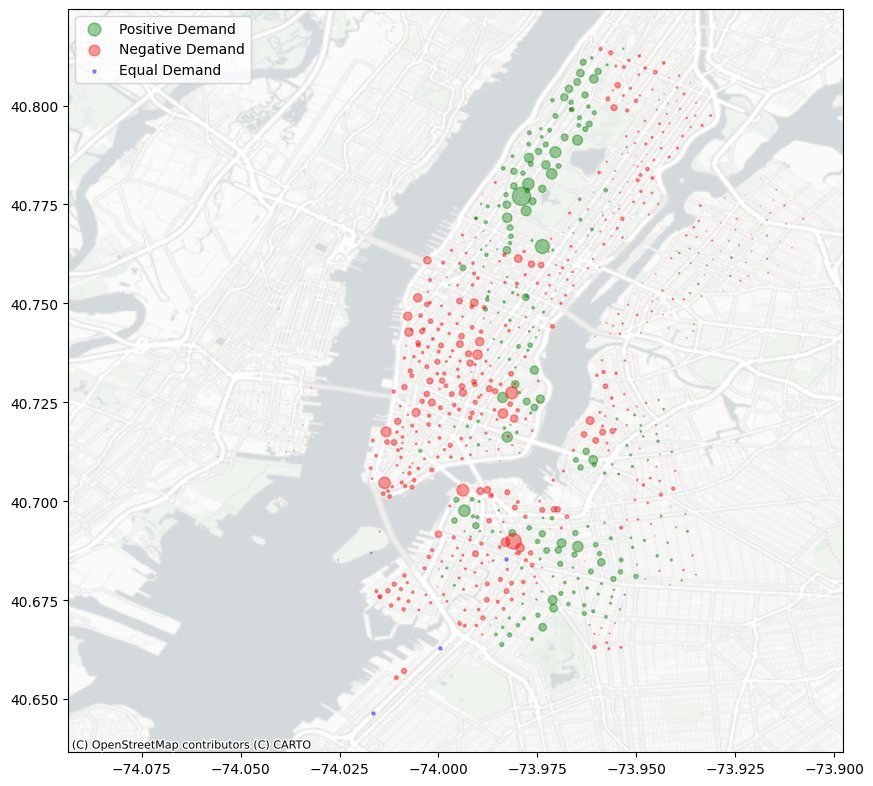

In [10]:
import geopandas as gpd
import geoplot
import contextily as cx
import matplotlib.pyplot as plt

#plot stations on map
gdf_stations = gpd.GeoDataFrame(
    stations, geometry=gpd.points_from_xy(stations.longitude, stations.latitude))

gdf_stations.set_crs(epsg=4326, inplace=True)

#boroughs = gpd.read_file(geoplot.datasets.get_path('nybb'))

fig,ax=plt.subplots(figsize=(10,10))


#boroughs.plot(ax=ax,alpha=0.4,color="grey")
gdf_stations[gdf_stations['total_demand_type']=="Positive"].plot(ax=ax,markersize=gdf_stations[gdf_stations['total_demand_type']=="Positive"]['total_demand'].to_numpy()/100, alpha=0.4,color="green", label="Positive Demand", aspect='equal')
gdf_stations[gdf_stations['total_demand_type']=="Negative"].plot(ax=ax,markersize=-1*gdf_stations[gdf_stations['total_demand_type']=="Negative"]['total_demand'].to_numpy()/100, alpha=0.4,color="red", label="Negative Demand", aspect='equal')
gdf_stations[gdf_stations['total_demand_type']=="Equal"].plot(ax=ax,markersize=5, alpha=0.4,color="blue", label="Equal Demand", aspect='equal')
minx, miny, maxx, maxy = gdf_stations.total_bounds
margin = 0.01
minx -= margin
miny -= margin
maxx += margin
maxy += margin
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax, zoom=12, crs=gdf_stations.crs.to_string(),source=cx.providers.CartoDB.PositronNoLabels)
plt.legend()


count      845.000000
mean         0.325444
std       1423.881273
min     -11943.000000
25%       -244.000000
50%        -39.000000
75%         71.000000
max      17088.000000
Name: total_demand, dtype: float64

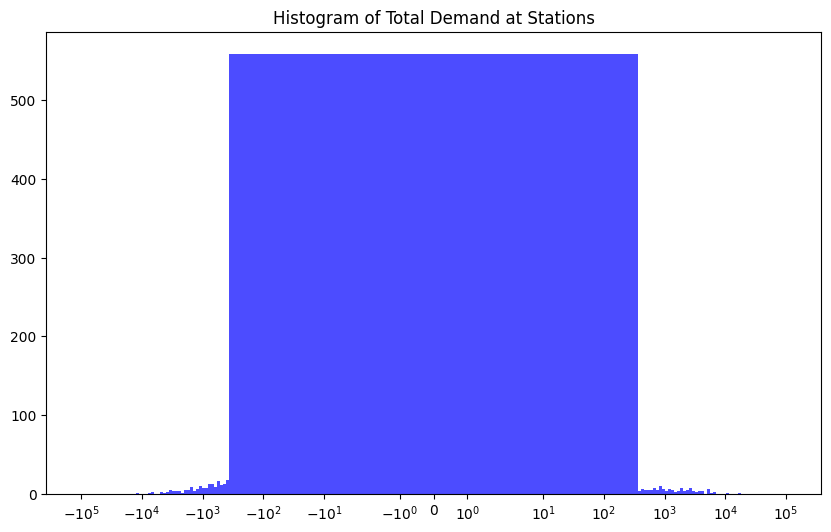

In [11]:
# histogram of total demand
plt.figure(figsize=(10,6))
cutoff = 365
bins = np.logspace(np.log10(cutoff),np.log10(100000), 50)
bins = np.concatenate((-bins[::-1], bins))
plt.hist(stations['total_demand'], bins=bins, color='blue', alpha=0.7)

plt.title('Histogram of Total Demand at Stations')
plt.xscale('symlog')
stations['total_demand'].describe()

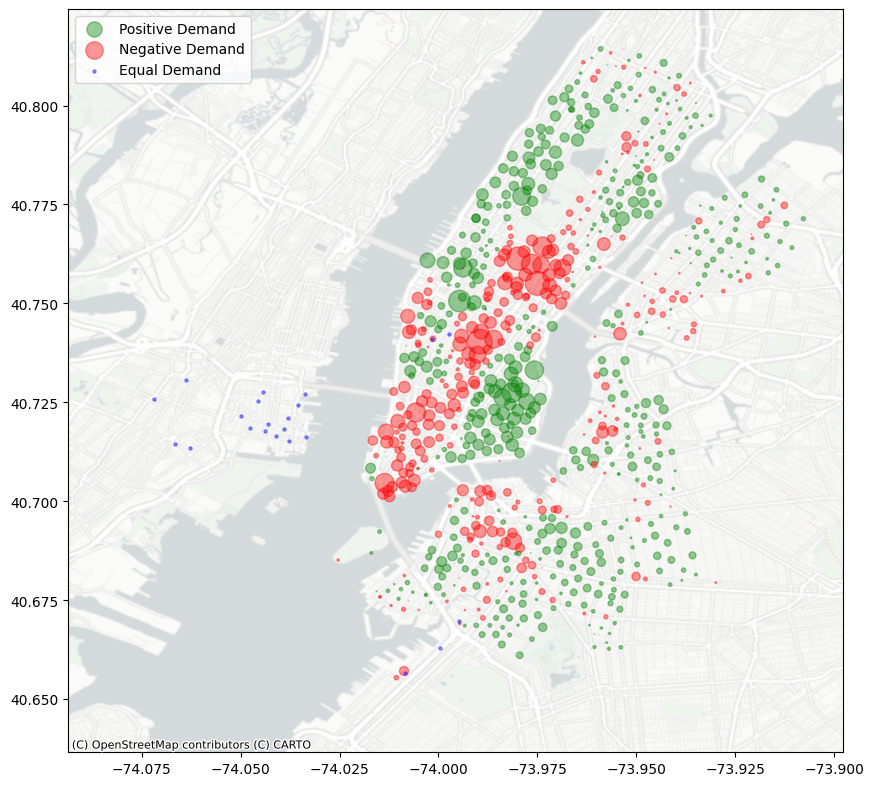

In [12]:
# before noon
fig,ax=plt.subplots(figsize=(10,10))
gdf_stations[gdf_stations['before_noon_demand_type']=="Positive"].plot(ax=ax,markersize=gdf_stations[gdf_stations['before_noon_demand_type']=="Positive"]['before_noon_demand'].to_numpy()/100, alpha=0.4,color="green", label="Positive Demand", aspect='equal')
gdf_stations[gdf_stations['before_noon_demand_type']=="Negative"].plot(ax=ax,markersize=-1*gdf_stations[gdf_stations['before_noon_demand_type']=="Negative"]['before_noon_demand'].to_numpy()/100, alpha=0.4,color="red", label="Negative Demand", aspect='equal')
gdf_stations[gdf_stations['before_noon_demand_type']=="Equal"].plot(ax=ax,markersize=5, alpha=0.4,color="blue", label="Equal Demand", aspect='equal')
minx, miny, maxx, maxy = gdf_stations.total_bounds
margin = 0.01
minx -= margin
miny -= margin
maxx += margin
maxy += margin
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax, zoom=12, crs=gdf_stations.crs.to_string(),source=cx.providers.CartoDB.PositronNoLabels)
plt.legend()

count      845.000000
mean       197.294675
std       4513.434202
min     -31544.000000
25%      -1023.000000
50%        354.000000
75%       2209.000000
max      23982.000000
Name: before_noon_demand, dtype: float64

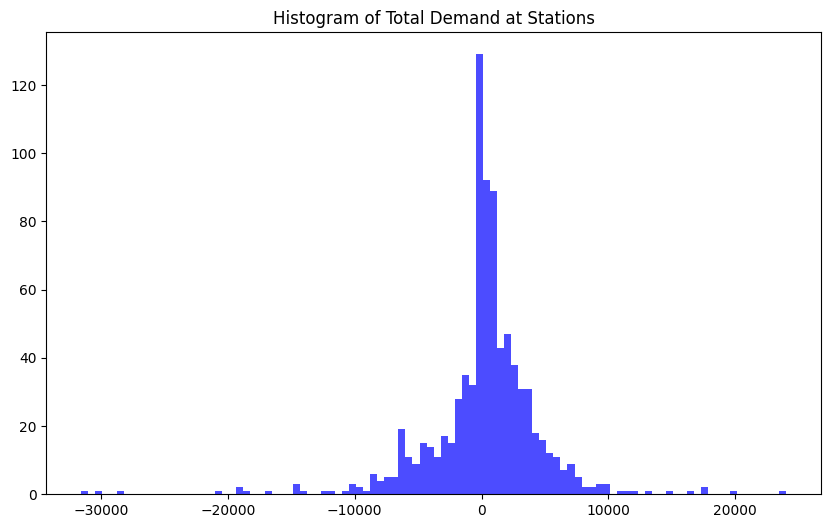

In [13]:
# histogram of total demand
import numpy as np
plt.figure(figsize=(10,6))
plt.hist(stations['before_noon_demand'], bins=100, color='blue', alpha=0.7)
plt
plt.title('Histogram of Total Demand at Stations')
stations['before_noon_demand'].describe()

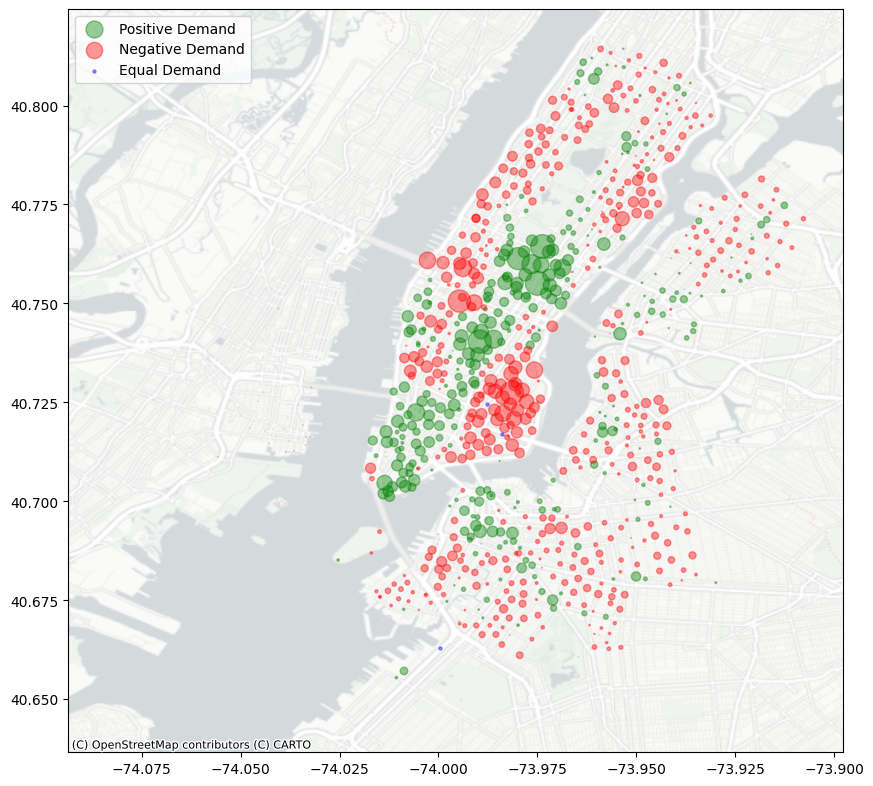

In [14]:
import numpy as np
fig,ax=plt.subplots(figsize=(10,10))
gdf_stations[gdf_stations['after_noon_demand_type']=="Positive"].plot(ax=ax,markersize=gdf_stations[gdf_stations['after_noon_demand_type']=="Positive"]['after_noon_demand'].to_numpy()/100, alpha=0.4,color="green", label="Positive Demand", aspect='equal')
gdf_stations[gdf_stations['after_noon_demand_type']=="Negative"].plot(ax=ax,markersize=-1*gdf_stations[gdf_stations['after_noon_demand_type']=="Negative"]['after_noon_demand'].to_numpy()/100, alpha=0.4,color="red", label="Negative Demand", aspect='equal')
gdf_stations[gdf_stations['after_noon_demand_type']=="Equal"].plot(ax=ax,markersize=5, alpha=0.4,color="blue", label="Equal Demand", aspect='equal')
minx, miny, maxx, maxy = gdf_stations.total_bounds
margin = 0.01
minx -= margin
miny -= margin
maxx += margin
maxy += margin
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax, zoom=12, crs=gdf_stations.crs.to_string(),source=cx.providers.CartoDB.PositronNoLabels)
plt.legend()

count      845.000000
mean      -196.969231
std       4260.903333
min     -27435.000000
25%      -1843.000000
50%       -421.000000
75%        874.000000
max      29986.000000
Name: after_noon_demand, dtype: float64

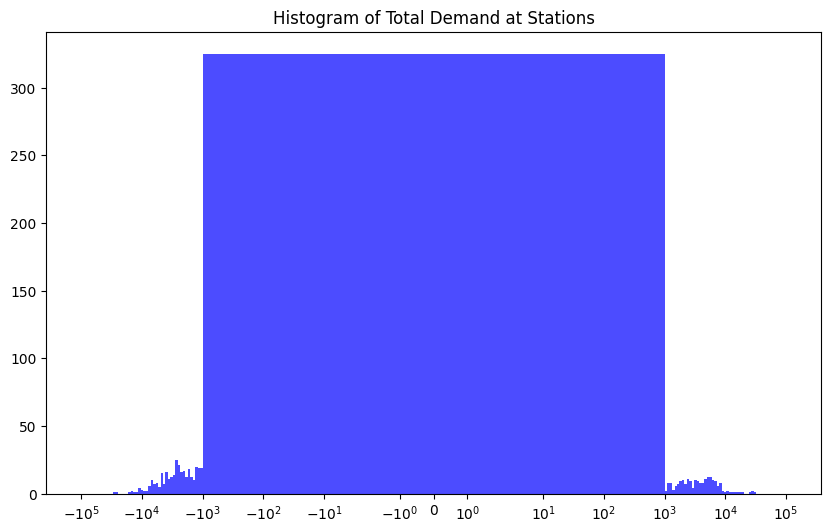

In [15]:
plt.figure(figsize=(10,6))

cutoff = 1000
bins = np.logspace(np.log10(cutoff),np.log10(100000), 50)
bins = np.concatenate((-bins[::-1], bins))
plt.hist(gdf_stations['after_noon_demand'], bins=bins, color='blue', alpha=0.7)

plt.title('Histogram of Total Demand at Stations')
plt.xscale('symlog')
gdf_stations['after_noon_demand'].describe()

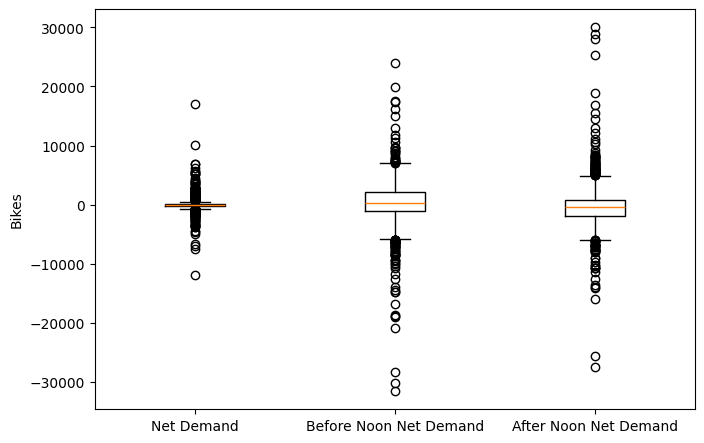

In [ ]:
# boxplots of before noon and after noon demand

plots = [stations["total_demand"],stations["before_noon_demand"], stations["after_noon_demand"]]

fig = plt.figure(figsize =(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(plots, labels=["Net Demand", "Before Noon Net Demand", "After Noon Net Demand"])
plt.ylabel("Bikes")
#plt.yscale("symlog")
#plt.savefig('boxplots_demand.png')
plt.show()


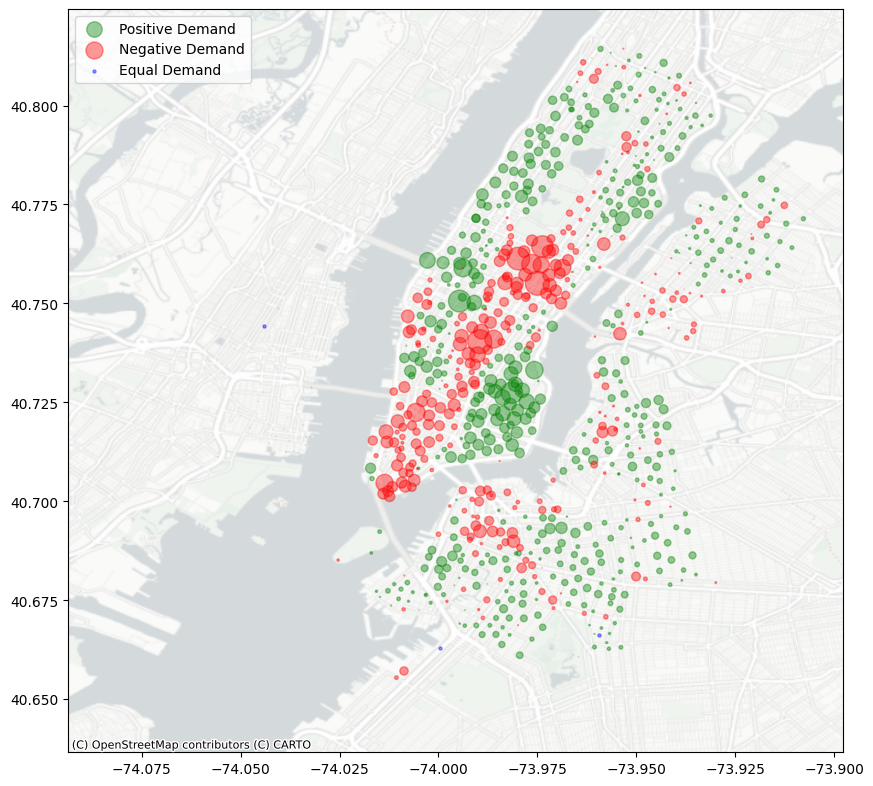

In [17]:
import numpy as np
gdf_stations["before noon minus after noon"] = gdf_stations["before_noon_demand"] - gdf_stations["after_noon_demand"]
gdf_stations["before_noon_minus_after_noon_demand_type"] = gdf_stations["before noon minus after noon"].apply(
    lambda x: "Positive" if x > 0 else "Equal" if x == 0 else "Negative"
)
fig,ax=plt.subplots(figsize=(10,10))
gdf_stations[gdf_stations['before_noon_minus_after_noon_demand_type']=="Positive"].plot(ax=ax,markersize=gdf_stations[gdf_stations['before_noon_minus_after_noon_demand_type']=="Positive"]['before noon minus after noon'].to_numpy()/200, alpha=0.4,color="green", label="Positive Demand", aspect='equal')
gdf_stations[gdf_stations['before_noon_minus_after_noon_demand_type']=="Negative"].plot(ax=ax,markersize=-1*gdf_stations[gdf_stations['before_noon_minus_after_noon_demand_type']=="Negative"]['before noon minus after noon'].to_numpy()/200, alpha=0.4,color="red", label="Negative Demand", aspect='equal')
gdf_stations[gdf_stations['before_noon_minus_after_noon_demand_type']=="Equal"].plot(ax=ax,markersize=5, alpha=0.4,color="blue", label="Equal Demand", aspect='equal')
minx, miny, maxx, maxy = gdf_stations.total_bounds
margin = 0.01
minx -= margin
miny -= margin
maxx += margin
maxy += margin
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax, zoom=12, crs=gdf_stations.crs.to_string(),source=cx.providers.CartoDB.PositronNoLabels)
plt.legend()

count      845.000000
mean       394.263905
std       8661.716523
min     -60197.000000
25%      -1970.000000
50%        758.000000
75%       4151.000000
max      49572.000000
Name: before noon minus after noon, dtype: float64

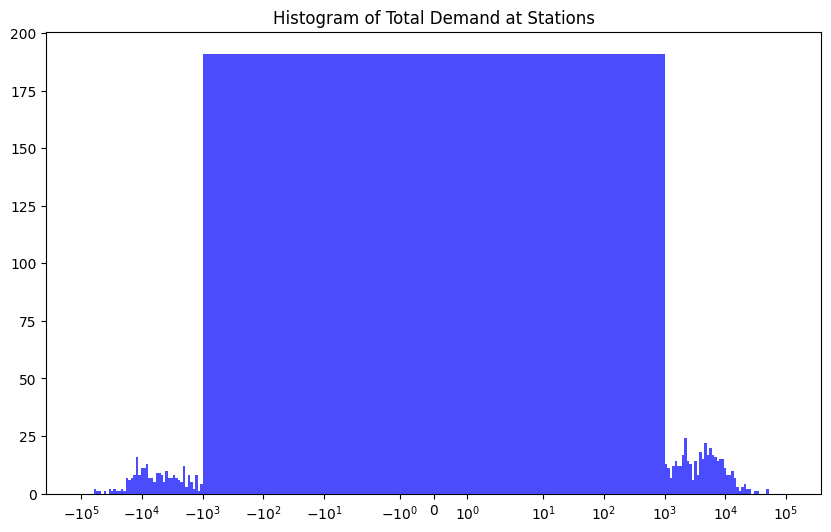

In [18]:

plt.figure(figsize=(10,6))

cutoff = 1000
bins = np.logspace(np.log10(cutoff),np.log10(100000), 50)
bins = np.concatenate((-bins[::-1], bins))
plt.hist(gdf_stations['before noon minus after noon'], bins=bins, color='blue', alpha=0.7)

plt.title('Histogram of Total Demand at Stations')
plt.xscale('symlog')
gdf_stations['before noon minus after noon'].describe()


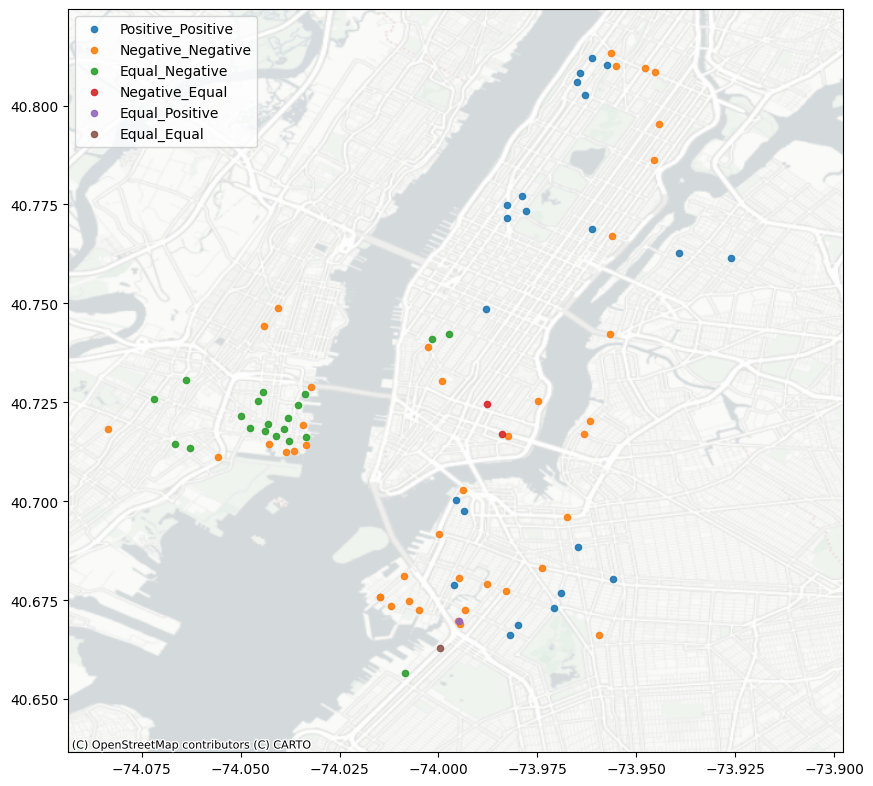

In [19]:
gdf_stations["full_demand_type"] = gdf_stations["before_noon_demand_type"] + "_" + gdf_stations["after_noon_demand_type"]

# plot with color for each full_demand_type
fig,ax=plt.subplots(figsize=(10,10))
for demand_type in gdf_stations['full_demand_type'].unique():
    if demand_type not in ["Positive_Negative", "Negative_Positive"]:
        gdf_stations[gdf_stations['full_demand_type']==demand_type].plot(
            ax=ax,
            markersize=20,
            alpha=0.9,
            label=demand_type,
            aspect='equal'
        )
minx, miny, maxx, maxy = gdf_stations.total_bounds
margin = 0.01
minx -= margin
miny -= margin
maxx += margin
maxy += margin
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax, zoom=12, crs=gdf_stations.crs.to_string(),source=cx.providers.CartoDB.PositronNoLabels)
plt.legend()


In [60]:
type_count = gdf_stations['full_demand_type'].value_counts()
print(type_count.to_latex())

\begin{tabular}{lr}
\toprule
 & count \\
full_demand_type &  \\
\midrule
Positive_Negative & 470 \\
Negative_Positive & 288 \\
Negative_Negative & 41 \\
Positive_Positive & 22 \\
Equal_Negative & 20 \\
Negative_Equal & 2 \\
Equal_Positive & 1 \\
Equal_Equal & 1 \\
\bottomrule
\end{tabular}



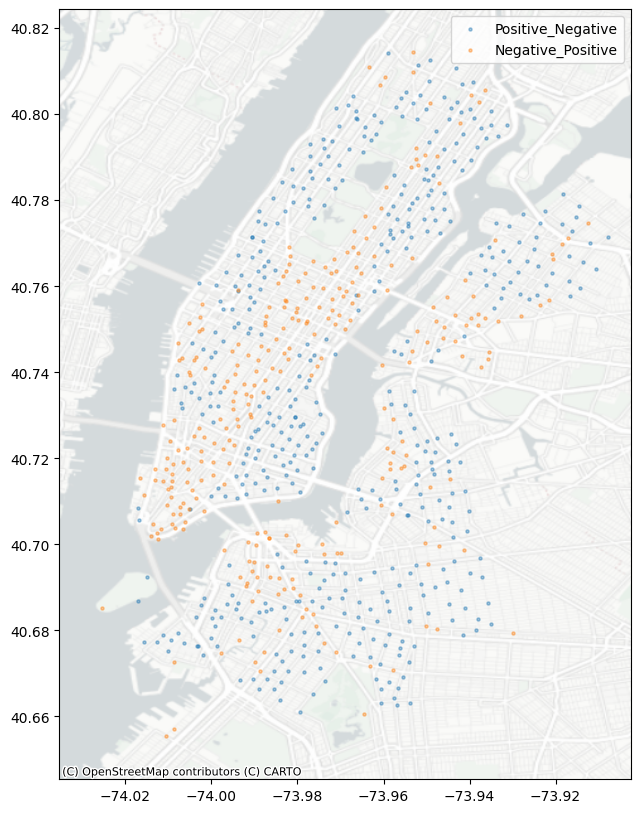

In [21]:
# plot with color for each full_demand_type
fig,ax=plt.subplots(figsize=(10,10))
for demand_type in ["Positive_Negative", "Negative_Positive"]:
    gdf_stations[gdf_stations['full_demand_type']==demand_type].plot(
        ax=ax,
        markersize=5,
        alpha=0.4,
        label=demand_type,
        aspect='equal'
    )
minx, miny, maxx, maxy = gdf_stations[gdf_stations['full_demand_type']==demand_type].total_bounds
margin = 0.01
minx -= margin
miny -= margin
maxx += margin
maxy += margin
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax, zoom=12, crs=gdf_stations.crs.to_string(),source=cx.providers.CartoDB.PositronNoLabels)
plt.legend()

In [51]:
labels = ["Positive_Negative", "Negative_Positive"]
X = gdf_stations[gdf_stations['full_demand_type'].isin(labels)][['latitude', 'longitude']].to_numpy()
y = gdf_stations[gdf_stations['full_demand_type'].isin(labels)]['full_demand_type'].apply(lambda x: 1 if x=="Positive_Negative" else 0).to_numpy()
X.shape, y.shape

((758, 2), (758,))

In [52]:
# X to km
print(X)
X[:,0] = X[:,0] * 111  # latitude to km
X[:,1] = X[:,1] * 85   # longitude to km

# Normalize X
minx = X[:,0].min()
maxx = X[:,0].max()
miny = X[:,1].min()
maxy = X[:,1].max()

X[:,0] = (X[:,0] - minx) / (maxx - minx)
X[:,1] = (X[:,1] - miny) / (maxy - miny)
print(X)
print(minx, maxx, miny, maxy)

[[ 40.76727216 -73.99392888]
 [ 40.71911552 -74.00666661]
 [ 40.71117416 -74.00016545]
 ...
 [ 40.72746421 -73.97950418]
 [ 40.76754878 -73.92093346]
 [ 40.68461654 -73.98721285]]
[[0.71926974 0.26719175]
 [0.43237729 0.15888656]
 [0.38506676 0.21416402]
 ...
 [0.48211447 0.38984074]
 [0.7209177  0.88785052]
 [0.22685013 0.32429618]]
4511.76575874771 4530.397782608655 -6292.155021429062 -6282.158206


In [53]:
# train test split
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Best parameters are {'C': 10, 'gamma': 100} 
Score : 81.84818481848185%


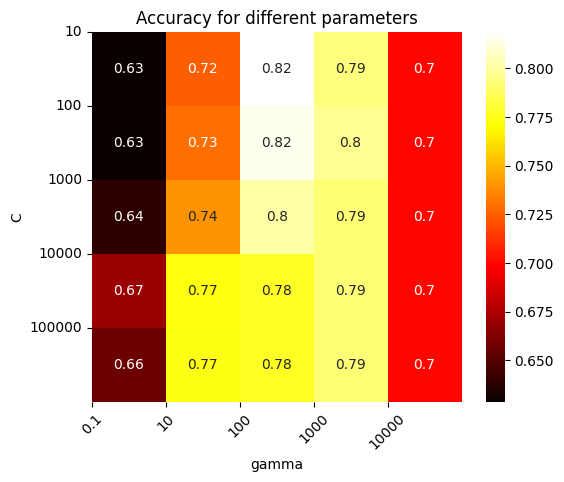

In [54]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

# define the parameter grid
param_grid = {'C': [10, 100, 1000, 10000, 100000],
              'gamma': [0.1, 10, 100, 1000, 10000]}

# perform grid search
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, 
                           param_grid, 
                           cv=3, 
                           n_jobs=-1)
grid_search.fit(X, y)

print(
    "Best parameters are {} \nScore : {}%".format(
        grid_search.best_params_, grid_search.best_score_*100)
)

# Reshape for heatmap
scores = grid_search.cv_results_["mean_test_score"].reshape(
    len(param_grid['gamma']),
    len(param_grid['C']))

# Heatmap
sns.heatmap(scores, 
            cmap = plt.cm.hot,
            annot= True, 
            cbar= True, 
            square=True)

plt.xlabel("gamma")
plt.ylabel("C")
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'], rotation=0)

plt.title("Accuracy for different parameters")
plt.show()


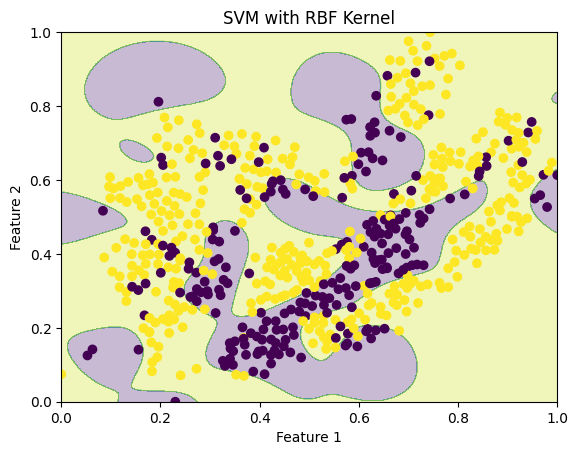

In [55]:
# Border map

clf = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
clf.fit(X, y)
y_pred = clf.predict(X)

xx, yy = np.meshgrid(
        np.linspace(-0.1, 1.1, 1000),
        np.linspace(-0.1, 1.1, 1000)
    )

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("SVM with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()



In [56]:
y_test_pred = clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8092105263157895

In [57]:

pltxx = (xx * (maxx - minx) + minx) / 111  # back to latitude
pltyy = (yy * (maxy - miny) + miny) / 85
Z.mean()

0.753196

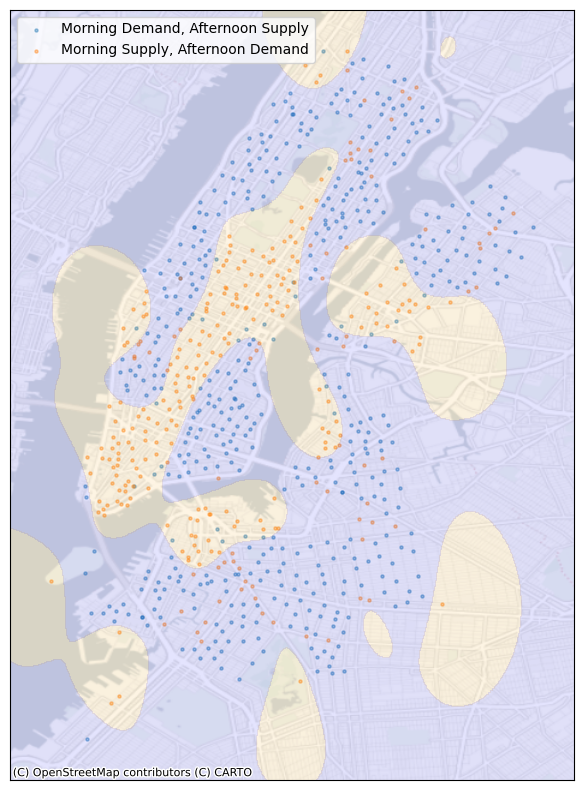

In [58]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)



for demand_type, label in [("Positive_Negative", "Morning Demand, Afternoon Supply"), ("Negative_Positive", "Morning Supply, Afternoon Demand")]:
    gdf_stations[gdf_stations['full_demand_type']==demand_type].plot(
        ax=ax,
        markersize=5,
        alpha=0.4,
        label=label,
        aspect='equal'
    )
minx, miny, maxx, maxy = gdf_stations[gdf_stations['full_demand_type'].isin(["Positive_Negative", "Negative_Positive"])].total_bounds
margin = 0.01
minx -= margin
miny -= margin
maxx += margin
maxy += margin
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

cx.add_basemap(ax, zoom=12, crs=gdf_stations.crs.to_string(),source=cx.providers.CartoDB.PositronNoLabels)

# add contour
plt.contourf(pltyy, pltxx, Z, alpha=0.1, levels=[-0.5, 0.5, 1.5], colors=['orange', 'blue'])
ax.set_yticks([])
ax.set_xticks([])
plt.legend()
plt.savefig("svm_demand_segmentation_map.png")